# Load Data

In [1]:
from pyrecdp.datasets import ibm_fraud_detect

train_data = ibm_fraud_detect().to_pandas()
train_data

,User,Card,Year,Month,Day,Time,Amount,Use Chip,Merchant Name,Merchant City,Merchant State,Zip,MCC,Errors?,Is Fraud?
0,0,0,2002,9,1,06:21,$134.09,Swipe Transaction,3527213246127876953,La Verne,CA,91750.0,5300,NaN,No
1,0,0,2002,9,1,06:42,$38.48,Swipe Transaction,-727612092139916043,Monterey Park,CA,91754.0,5411,NaN,No
2,0,0,2002,9,2,06:22,$120.34,Swipe Transaction,-727612092139916043,Monterey Park,CA,91754.0,5411,NaN,No
3,0,0,2002,9,2,17:45,$128.95,Swipe Transaction,3414527459579106770,Monterey Park,CA,91754.0,5651,NaN,No
4,0,0,2002,9,3,06:23,$104.71,Swipe Transaction,5817218446178736267,La Verne,CA,91750.0,5912,NaN,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24386895,1999,1,2020,2,27,22:23,$-54.00,Chip Transaction,-5162038175624867091,Merrimack,NH,3054.0,5541,NaN,No
24386896,1999,1,2020,2,27,22:24,$54.00,Chip Transaction,-5162038175624867091,Merrimack,NH,3054.0,5541,NaN,No
24386897,1999,1,2020,2,28,07:43,$59.15,Chip Transaction,2500998799892805156,Merrimack,NH,3054.0,4121,NaN,No
24386898,1999,1,2020,2,28,20:10,$43.12,Chip Transaction,2500998799892805156,Merrimack,NH,3054.0,4121,NaN,No


# RecDP Analyze data

In [4]:
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 150)
transformed_pandas

,User,Card,Year,Month,Day,Merchant_Name,Zip,MCC,Is_Fraud,Amount__string_to_number,Time__day,Time__month,Time__weekday,Time__year,Time__hour,Use_Chip__idx,Merchant_City__idx,Merchant_State__idx,Errors__idx,Card__0,Card__1,Card__2,Card__3,Card__4,Card__5,Card__6,Card__7,Card__8,Use_Chip__Chip_Transaction,Use_Chip__Online_Transaction,Use_Chip__Swipe_Transaction,Errors_Bad_CVV,Errors_Bad_Card_Number,Errors_Bad_Expiration,Errors_Bad_PIN,Errors_Bad_Zipcode,Errors_Insufficient_Balance,Errors_Technical_Glitch
0,0,0,2002,9,1,3527213246127876953,91750.0,5300,0,134,23,3,3,2023,6,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,2002,9,1,-727612092139916043,91754.0,5411,0,38,23,3,3,2023,6,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,0,0,2002,9,2,-727612092139916043,91754.0,5411,0,120,23,3,3,2023,6,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,2002,9,2,3414527459579106770,91754.0,5651,0,128,23,3,3,2023,17,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,2002,9,3,5817218446178736267,91750.0,5912,0,104,23,3,3,2023,6,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24386895,1999,1,2020,2,27,-5162038175624867091,3054.0,5541,0,54,23,3,3,2023,22,2,5600,46,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
24386896,1999,1,2020,2,27,-5162038175624867091,3054.0,5541,0,54,23,3,3,2023,22,2,5600,46,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
24386897,1999,1,2020,2,28,2500998799892805156,3054.0,4121,0,59,23,3,3,2023,7,2,5600,46,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
24386898,1999,1,2020,2,28,2500998799892805156,3054.0,4121,0,43,23,3,3,2023,20,2,5600,46,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


# RecDP end to end pipeline

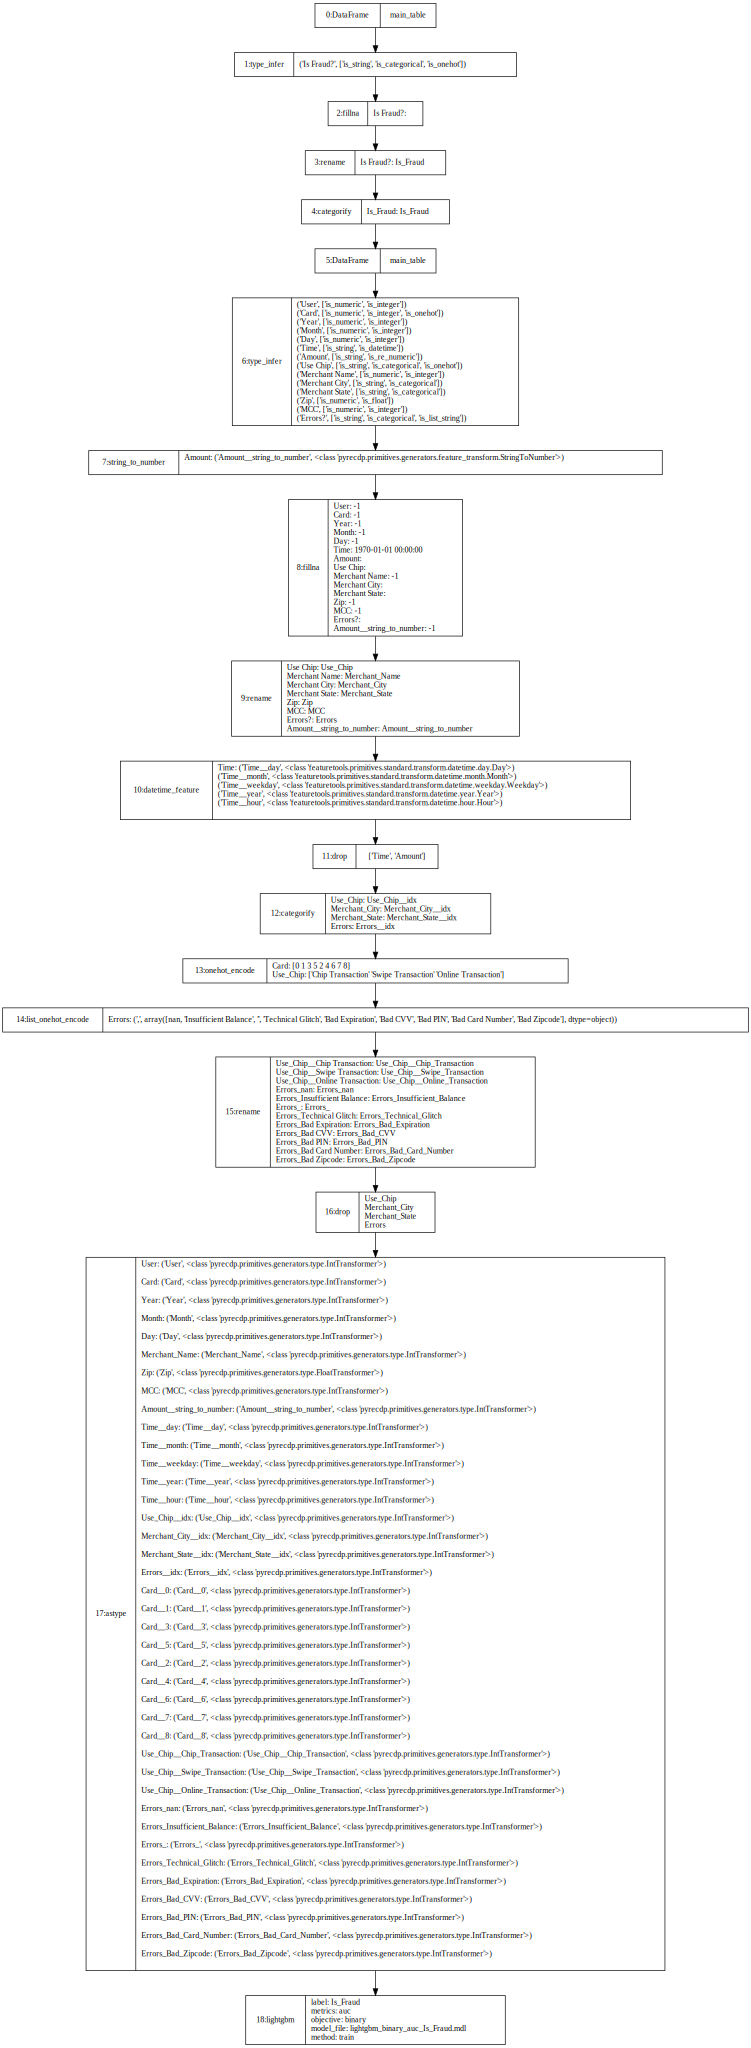

In [5]:
from pyrecdp.autofe import FeatureWrangler, DataEstimator

data_pipeline = FeatureWrangler(dataset=train_data, label="Is Fraud?")
train_pipeline = DataEstimator(metrics = 'auc', objective = 'binary', model_name='lightgbm', label = 'Is_Fraud', method = 'train', data_pipeline = data_pipeline)
train_pipeline.plot()

In [6]:
train_pipeline.fit_transform()

{0: DataFrame, 1: type_infer, 2: fillna, 3: rename, 4: categorify, 5: DataFrame, 6: type_infer, 7: string_to_number, 8: fillna, 9: rename, 10: datetime_feature, 11: drop, 12: categorify, 13: onehot_encode, 14: list_onehot_encode, 15: rename, 16: drop, 17: astype, 18: lightgbm}
execute with pandas started ...
execute DataFrame started ...
  execute DataFrame took 6.165006197988987e-06 sec
execute type_infer started ...
  execute type_infer took 2.6474008336663246e-05 sec
execute fillna started ...
  execute fillna took 1.3447314229561016 sec
execute rename started ...
  execute rename took 1.6572613409953192 sec
execute categorify started ...
  execute categorify took 2.2755704779410735 sec
execute DataFrame started ...
  execute DataFrame took 1.3452954590320587e-05 sec
execute type_infer started ...
  execute type_infer took 5.473999162088148 sec
execute string_to_number started ...
  execute string_to_number took 24.17125027999282 sec
execute fillna started ...
  execute fillna took 

/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:177: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:177: UserWarning: Found `num_rounds` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-packages/lightgbm/basic.py:1491: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via 'params' instead.
  _log_w

[LightGBM] [Warning] bagging_fraction is set=1, subsample=0.8 will be ignored. Current value: bagging_fraction=1
[LightGBM] [Warning] bagging_fraction is set=1, subsample=0.8 will be ignored. Current value: bagging_fraction=1
[LightGBM] [Info] Number of positive: 28266, number of negative: 23139289
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 1.092866 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 16353
[LightGBM] [Info] Number of data points in the train set: 23167555, number of used features: 37


/usr/local/lib/python3.10/dist-packages/lightgbm/basic.py:1491: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via 'params' instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] bagging_fraction is set=1, subsample=0.8 will be ignored. Current value: bagging_fraction=1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.001220 -> initscore=-6.707628
[LightGBM] [Info] Start training from score -6.707628
Training until validation scores don't improve for 50 rounds
[100]	valid_0's auc: 0.988423
[200]	valid_0's auc: 0.992344
[300]	valid_0's auc: 0.994188
[400]	valid_0's auc: 0.994718
[500]	valid_0's auc: 0.995316
[600]	valid_0's auc: 0.995722
[700]	valid_0's auc: 0.996098
[800]	valid_0's auc: 0.99629
[900]	valid_0's auc: 0.996447
[1000]	valid_0's auc: 0.996584
[1100]	valid_0's auc: 0.996685
[1200]	valid_0's auc: 0.996848
[1300]	valid_0's auc: 0.996925
[1400]	valid_0's auc: 0.997009
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Wa

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped t

In [14]:
train_data[train_data['Is Fraud?'] == 'No']

,User,Card,Year,Month,Day,Time,Amount,Use Chip,Merchant Name,Merchant City,Merchant State,Zip,MCC,Errors?,Is Fraud?
0,0,0,2002,9,1,06:21,$134.09,Swipe Transaction,3527213246127876953,La Verne,CA,91750.0,5300,NaN,No
1,0,0,2002,9,1,06:42,$38.48,Swipe Transaction,-727612092139916043,Monterey Park,CA,91754.0,5411,NaN,No
2,0,0,2002,9,2,06:22,$120.34,Swipe Transaction,-727612092139916043,Monterey Park,CA,91754.0,5411,NaN,No
3,0,0,2002,9,2,17:45,$128.95,Swipe Transaction,3414527459579106770,Monterey Park,CA,91754.0,5651,NaN,No
4,0,0,2002,9,3,06:23,$104.71,Swipe Transaction,5817218446178736267,La Verne,CA,91750.0,5912,NaN,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24386895,1999,1,2020,2,27,22:23,$-54.00,Chip Transaction,-5162038175624867091,Merrimack,NH,3054.0,5541,NaN,No
24386896,1999,1,2020,2,27,22:24,$54.00,Chip Transaction,-5162038175624867091,Merrimack,NH,3054.0,5541,NaN,No
24386897,1999,1,2020,2,28,07:43,$59.15,Chip Transaction,2500998799892805156,Merrimack,NH,3054.0,4121,NaN,No
24386898,1999,1,2020,2,28,20:10,$43.12,Chip Transaction,2500998799892805156,Merrimack,NH,3054.0,4121,NaN,No


In [15]:
train_data[train_data['Is Fraud?'] == 'Yes']

,User,Card,Year,Month,Day,Time,Amount,Use Chip,Merchant Name,Merchant City,Merchant State,Zip,MCC,Errors?,Is Fraud?
4099,0,0,2015,11,15,12:55,$287.13,Online Transaction,-8194607650924472520,ONLINE,NaN,NaN,3001,NaN,Yes
4100,0,0,2015,11,15,13:19,$2.41,Online Transaction,-7759074308363763111,ONLINE,NaN,NaN,5651,NaN,Yes
4101,0,0,2015,11,16,09:41,$50.81,Online Transaction,-551332107213382088,ONLINE,NaN,NaN,4411,NaN,Yes
4102,0,0,2015,11,16,09:46,$248.36,Online Transaction,4872340518840476610,ONLINE,NaN,NaN,5732,NaN,Yes
4103,0,0,2015,11,16,11:20,$473.00,Online Transaction,-8566951830324093739,ONLINE,NaN,NaN,3640,NaN,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24375668,1997,2,2016,9,4,10:45,$1.25,Online Transaction,6455213054093379528,ONLINE,NaN,NaN,5815,NaN,Yes
24375670,1997,2,2016,9,4,12:30,$116.66,Online Transaction,822647939787511611,ONLINE,NaN,NaN,5311,NaN,Yes
24375671,1997,2,2016,9,4,12:40,$359.99,Online Transaction,8080934608468946743,ONLINE,NaN,NaN,5310,NaN,Yes
24375672,1997,2,2016,9,4,13:45,$351.51,Online Transaction,-4282466774399734331,ONLINE,NaN,NaN,4829,NaN,Yes
